In [1]:

import pandas as pd

In [6]:
df=pd.read_csv("Advertising.csv", index_col=0)
df.head()

,TV,radio,newspaper,sales
1,230.1,37.8,69.2,22.1
2,44.5,39.3,45.1,10.4
3,17.2,45.9,69.3,9.3
4,151.5,41.3,58.5,18.5
5,180.8,10.8,58.4,12.9


In [7]:
df.tail()

,TV,radio,newspaper,sales
196,38.2,3.7,13.8,7.6
197,94.2,4.9,8.1,9.7
198,177.0,9.3,6.4,12.8
199,283.6,42.0,66.2,25.5
200,232.1,8.6,8.7,13.4


In [8]:
df.shape

(200, 4)

In [19]:
import seaborn as sns
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt


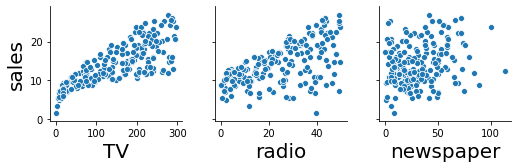

In [20]:

mpl.rcParams["axes.labelsize"] = 20
sns.pairplot(df, x_vars=["TV", "radio", "newspaper"], y_vars="sales")


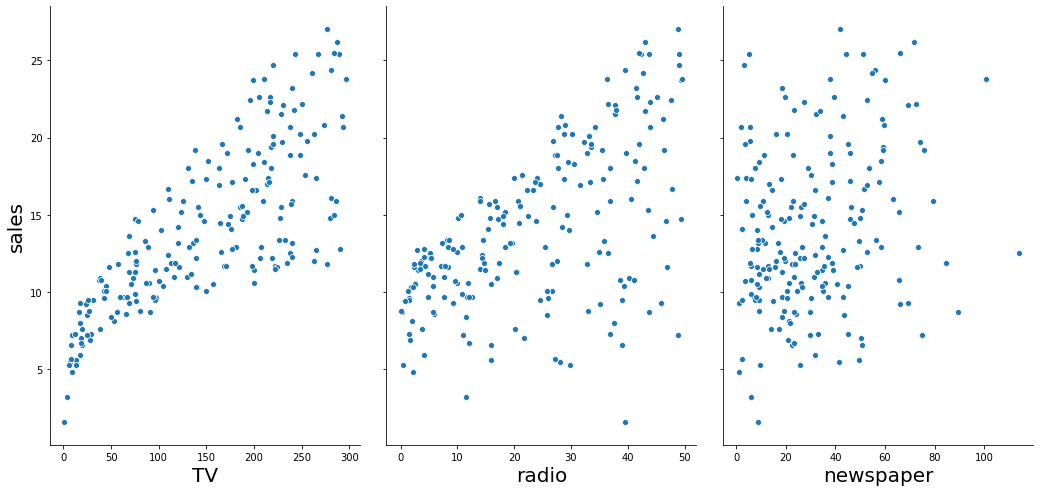

In [22]:
sns.pairplot(df, x_vars=["TV", "radio", "newspaper"], y_vars="sales", height=7, aspect=.7)
mpl.rcParams["axes.labelsize"] = 20



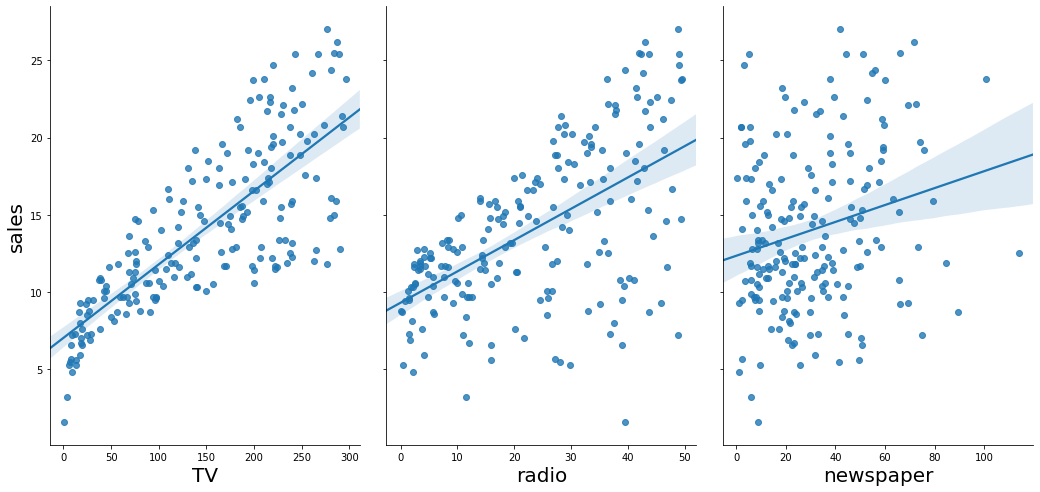

In [23]:
sns.pairplot(df, x_vars=["TV", "radio", "newspaper"], y_vars="sales", height=7, aspect=.7, kind="reg")
mpl.rcParams["axes.labelsize"] = 20



In [44]:
feature_cols=["TV", "radio", "newspaper"]
X=df[feature_cols]

In [45]:
X.head()

,TV,radio,newspaper
1,230.1,37.8,69.2
2,44.5,39.3,45.1
3,17.2,45.9,69.3
4,151.5,41.3,58.5
5,180.8,10.8,58.4


In [46]:
type(X)

pandas.core.frame.DataFrame

In [47]:
X.shape

(200, 3)

In [48]:
y=df.sales

In [49]:
y.head()

1    22.1
2    10.4
3     9.3
4    18.5
5    12.9
Name: sales, dtype: float64

In [50]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test=train_test_split(X, y ,random_state=42)

In [51]:
from sklearn.linear_model import LinearRegression
linreg=LinearRegression()
linreg.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [52]:
linreg.intercept_

2.778303460245281

In [53]:
linreg.coef_

array([0.04543356, 0.19145654, 0.00256809])

In [59]:
# pair the features names with the coefficients
feature_cols , linreg.coef_

(['TV', 'radio', 'newspaper'], array([0.04543356, 0.19145654, 0.00256809]))

# Making Prediction

In [62]:
y_pred=linreg.predict(X_test)

In [75]:
y_pred[:5]

array([16.38348211, 20.92434957, 21.61495426, 10.49069997, 22.17690456])

In [76]:
true=[100, 50, 30, 20]
pred=[90, 50, 50, 30]

$\large \text { Mean Absolute Error (MAE) is the mean of the absolute value of the erros:}$
$$\large \frac{1}{n} \sum_{i=1}^n| y_i- \hat y_i|$$

$\large \text { Mean Squared   Error (MSE) is the mean of the square erros:}$
$$\large \frac{1}{n} \sum_{i=1}^{n}(y_i- \hat y_i)^2 $$

$\large \text { Root Mean Squared Error (RMSE) is the square root of the mean value of the squared erros:}$
$$\large \sqrt{ \frac{1}{n} \sum_{i=1}^{n}(y_i- \hat y_i)^2}$$

In [77]:
from sklearn.metrics import mean_squared_error
mean_squared_error(y_test, y_pred)

2.880023730094194

In [79]:
feature_cols=["TV", "radio"]
X=df[feature_cols]
X_train, X_test, y_train, y_test=train_test_split(X, y ,random_state=42)
linreg=LinearRegression()
linreg.fit(X_train, y_train)
y_pred=linreg.predict(X_test)
mean_squared_error(y_test, y_pred)

2.8539947557761023

In [96]:
from sklearn.preprocessing import LabelEncoder

X=np.random.uniform(0.0, 1.0, size=(10,2))
y=np.random.choice(('Male', 'Female'), size=(10))
print(y)
le=LabelEncoder()
yt=le.fit_transform(y)
print(yt)


['Female' 'Male' 'Female' 'Female' 'Female' 'Female' 'Male' 'Female'
 'Female' 'Female']
[0 1 0 0 0 0 1 0 0 0]


In [111]:
#inverse transformation 
decode_output=[le.classes_[i] for i in yt]
np.array(decode_output)

array(['Female', 'Male', 'Female', 'Female', 'Female', 'Female', 'Male',
       'Female', 'Female', 'Female'], dtype='<U6')

In [114]:
#one-hotEncoding. with binarizes
from sklearn.preprocessing import LabelBinarizer
lb=LabelBinarizer()
Yb=lb.fit_transform(y)
print(Yb)

[[0]
 [1]
 [0]
 [0]
 [0]
 [0]
 [1]
 [0]
 [0]
 [0]]
